# Simple test with real data

In [1]:
import csv
import itertools as itt

import matplotlib.pyplot as plt
import numpy as np
import lengthPriors

import dynamicComputation as dc
import readers
import segment_viz

In [2]:
from defaultPriors import arcPriorTempo, arcPriorLoud, lengthPriorParamsTempo as lengthPriorParams

# Loading some data

In [3]:
timingsData = readers.readAllMazurkaTimingsAndSeg(timingPath="data/beat_time", segPath="data/deaf_structure_tempo")
dynData = readers.readAllMazurkaDataAndSeg(timingPath="data/beat_dyn", segPath="data/deaf_structure_loudness")

fullData = [(piece, interpret, tempo, tempoSeg, dyn, dynSeg) 
            for ((piece, interpret, tempo, tempoSeg),(piece2, interpret2, dyn, dynSeg))
            in itt.product(timingsData,dynData)
            if interpret == interpret2]

In [4]:
#arcPrior = [arcPriorTempo, arcPriorLoud]
arcPrior = arcPriorTempo

# Get it Running

In [9]:
# Unpack the data
(piece, interpret, tempo, tempoSeg, dyn, dynSeg) = fullData[0]

piece_formatted = piece[16:20]
print(piece_formatted, interpret)

#sampleData = list(zip(tempo, dyn[1:]))
sampleData, times = tempo
sampleData = list(sampleData)
segs = (tempoSeg, dynSeg)

tatums = list(range(len(sampleData)))

# Manually correct large anomalies
sampleData[106] = 200
sampleData[195] = 200

59-2 pid1263b-08


## Using a Gaussian Prior

In [ ]:

length_prior = lengthPriors.NormalLengthPrior(lengthPriorParams['mean'], lengthPriorParams['stddev'], range(
    len(sampleData)), lengthPriorParams['maxLength'])

post_boundaries, post_segments = dc.runAlphaBeta(sampleData, arcPrior, length_prior, return2D=True)

/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/src/dynamicComputation.py:53: RuntimeWarning: divide by zero encountered in log
  return np.log(lik_length)


/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/src/segment_viz.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/src/segment_viz.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


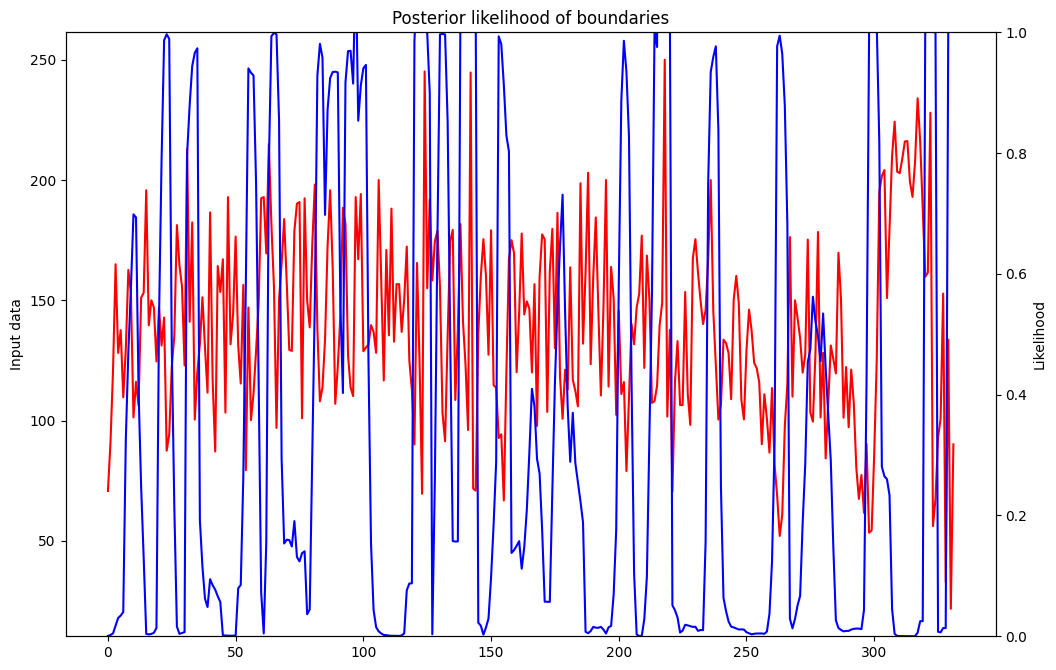

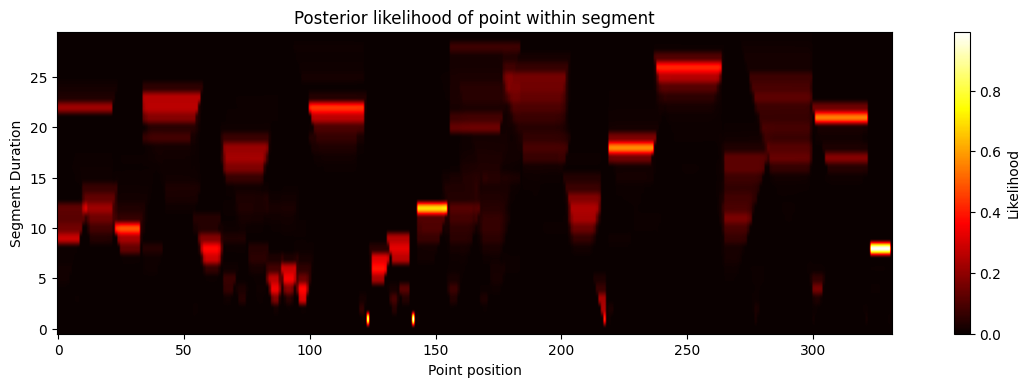

In [ ]:
_ = segment_viz.plot_segment_with_signal(post_marginals=post_boundaries, data=sampleData, data_time=list(range(len(sampleData))), smoothing=1)
_ = segment_viz.plot_segment_beams(post2_bidim=post_segments, max_length=length_prior.maxLength)

## Using a Geometric Prior

/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/src/dynamicComputation.py:53: RuntimeWarning: divide by zero encountered in log
  return np.log(lik_length)
/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/src/segment_viz.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


TypeError: plot_segment_beams() got an unexpected keyword argument 'length_prior'

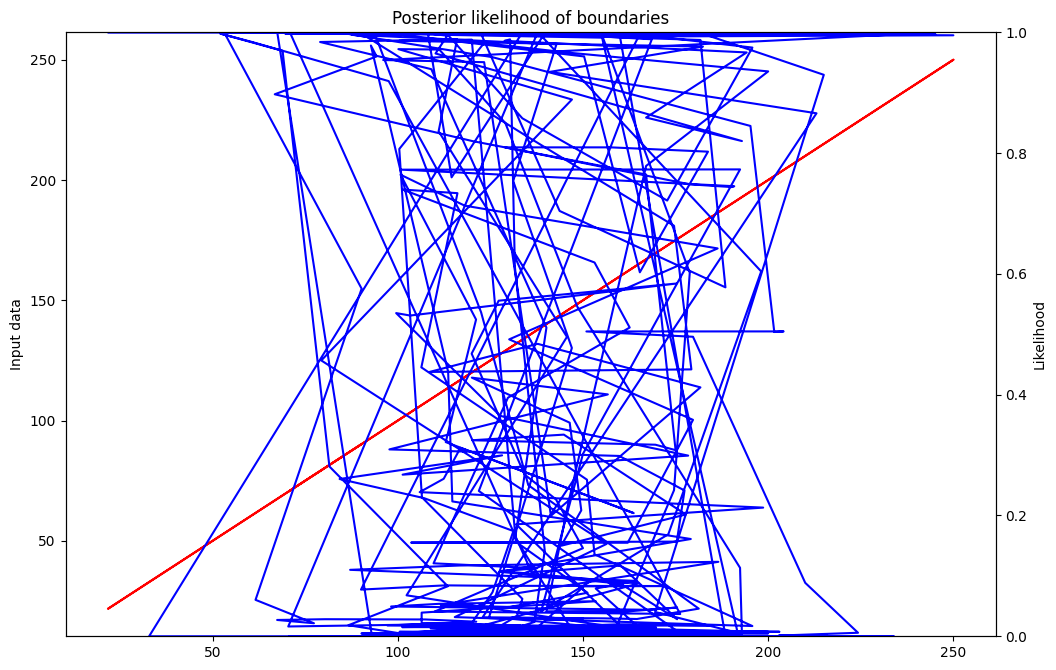

In [ ]:

length_prior = lengthPriors.GeometricLengthPrior(len(sampleData), 0.95, min_length=5, max_length=30)

post_boundaries, post_segments = dc.runAlphaBeta(sampleData, arcPrior, length_prior, return2D=True)
# _ = segment_viz.plot_segment_with_signal(post_marginals=post_boundaries, data=sampleData, data_time=sampleData)
# _ = segment_viz.plot_segment_beams(post2_bidim=post_segments, length_prior=length_prior)

/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/src/segment_viz.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/src/segment_viz.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


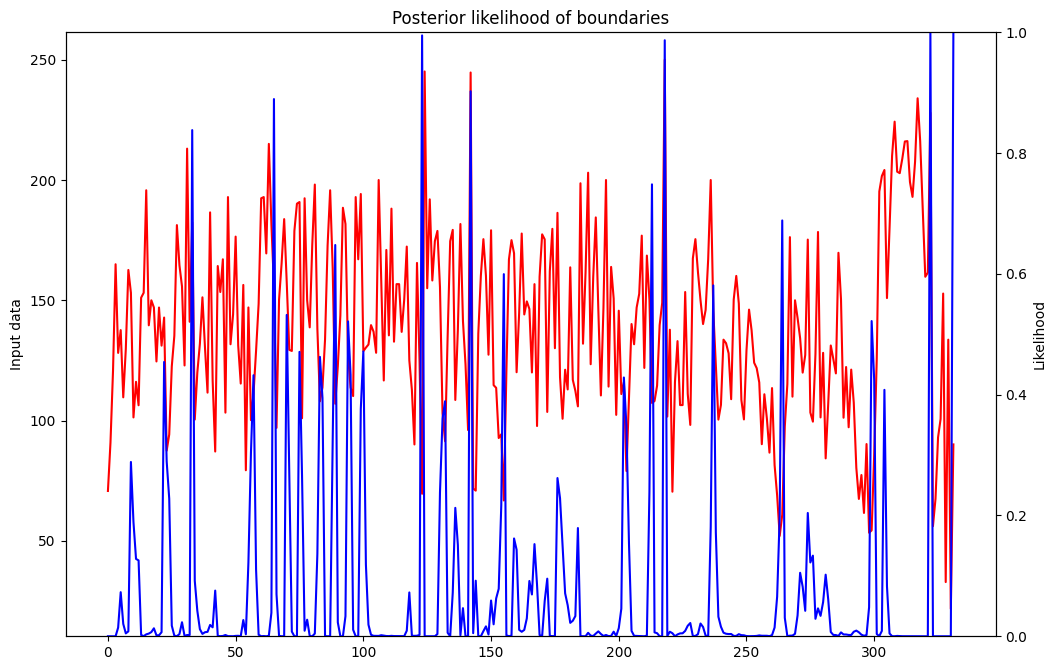

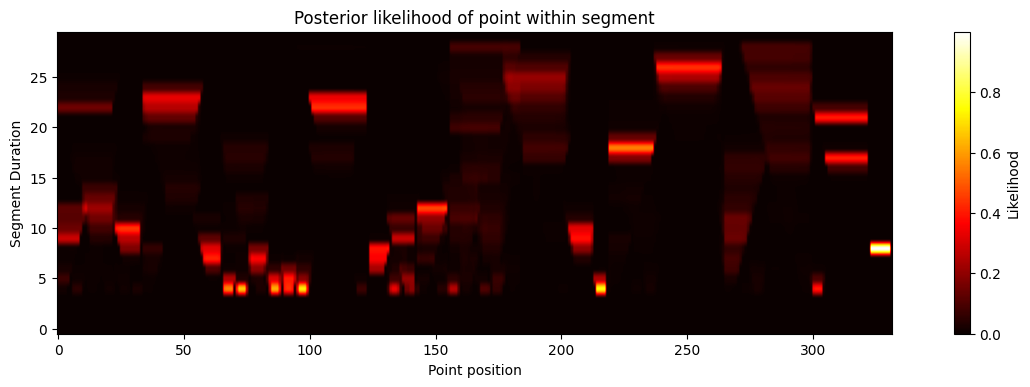

In [ ]:
_ = segment_viz.plot_segment_with_signal(post_marginals=post_boundaries, data=sampleData, data_time=list(range(len(sampleData))), smoothing=1)
_ = segment_viz.plot_segment_beams(post2_bidim=post_segments, max_length=length_prior.maxLength)

## Using an Empirical Prior

In [ ]:
length_observations = sum([[length for length in np.diff(t_seg)] 
                           for (_piece, _interpret, _tempo, t_seg, _dyn, _dynSeg) in fullData],
                          start=[])

In [ ]:
length_prior = lengthPriors.EmpiricalLengthPrior(length_observations, len(sampleData), maxLength=30)

post_boundaries, post_segments = dc.runAlphaBeta(sampleData, arcPrior, length_prior, return2D=True)
# _ = segment_viz.plot_segment_with_signal(post_marginals=post_boundaries, data=sampleData, data_time=sampleData)
# _ = segment_viz.plot_segment_beams(post2_bidim=post_segments, length_prior=length_prior)

/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/src/dynamicComputation.py:53: RuntimeWarning: divide by zero encountered in log
  return np.log(lik_length)


/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/src/segment_viz.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/src/segment_viz.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


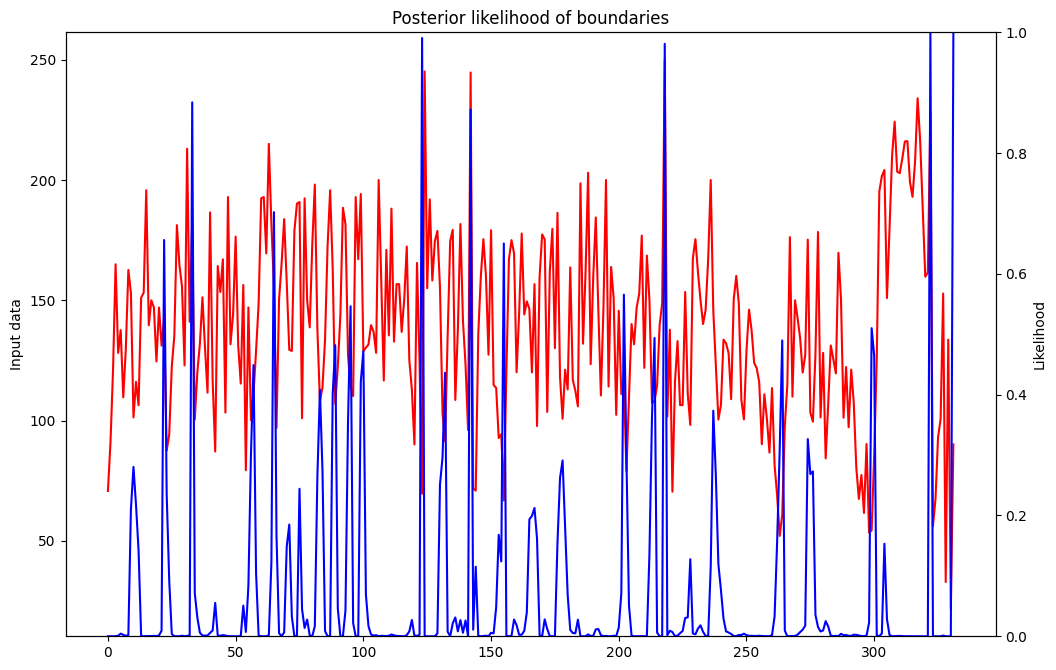

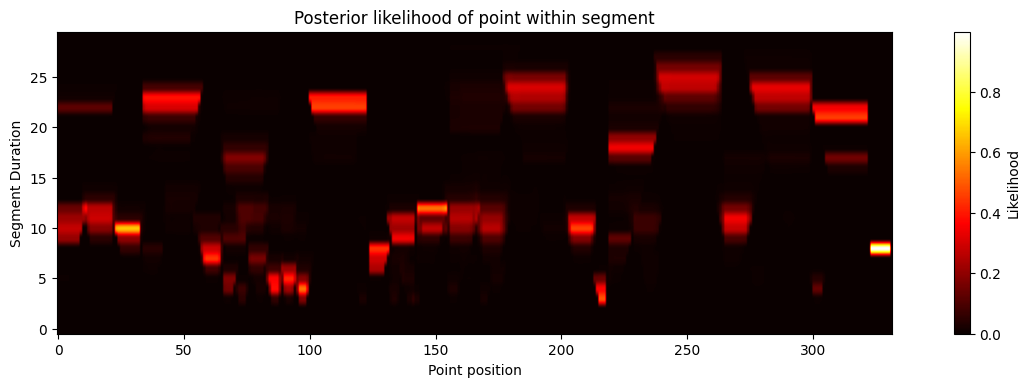

In [ ]:
_ = segment_viz.plot_segment_with_signal(post_marginals=post_boundaries, data=sampleData, data_time=list(range(len(sampleData))), smoothing=1)
_ = segment_viz.plot_segment_beams(post2_bidim=post_segments, max_length=length_prior.maxLength)

In [ ]:
import pandas as pd
times = np.cumsum(1/(tempo/60))+2
df = pd.DataFrame.from_dict({'time':times, 'p_boundary': post_boundaries})
df.to_csv("boundaries_post.csv")

## Using a Uniform Prior

In [ ]:

length_prior4 = lengthPriors.EmpiricalLengthPrior(range(5, 30), len(sampleData), maxLength=30)

post_boundaries4, post_segments4 = dc.runAlphaBeta(sampleData, arcPrior, length_prior4, return2D=True)
# _ = segment_viz.plot_segment_with_signal(post_marginals=post_boundaries, data=sampleData, data_time=sampleData)
# _ = segment_viz.plot_segment_beams(post2_bidim=post_segments, length_prior=length_prior)

KeyboardInterrupt: 

In [ ]:
_ = segment_viz.plot_segment_with_signal(post_marginals=post_boundaries4, data=sampleData, data_time=list(range(len(sampleData))), smoothing=1)
_ = segment_viz.plot_segment_beams(post2_bidim=post_segments4, max_length=length_prior4.maxLength)